# QUESTION1

## a.

for the distance modulus $\mu = m - M = 5(log_{10}(d)-1)$

=> $d = 10^{\frac{\mu}{5}+1}\ pc$

$\delta d = \frac{1}{5}ln(10)10^{\frac{\mu}{5}+1}\delta\mu = 0.461d\delta\mu$

with $\sigma_{M} = 0.12\ mag\qquad\sigma_{m} \sim 0$

$\delta\mu = 0.12\ mag$

=> $\delta d = 0.05532d$

## b.

$D = v/H_{0}$

$\delta D = \frac{1}{H_{0}}\sigma_{v}$

give $\sigma_{v} \sim 600\ km\ s^{-1}\qquad H_{0} = 70\ km\ s^{-1}\ Mpc^{-1}$

when $\delta D = 0.05532D$

=> $D_{0} = 155.0\ Mpc$

with corresponding distance modulus $\mu = 5(log_{10}(D_{0}\times10^{6})-1) = 35.95\ mag$

## c.

with $\mu = m - M$

when $M_{B} = -22\ mag\qquad \sigma_{M_{B}} = 0.12\ mag$

=> $m_{B} = \mu + M_{B} = 13.95 \pm 0.12\ mag$

## d.

with $m_{B} = 18.5\qquad M_{B} = -22\ mag\qquad \sigma_{M_{B}} = 0.12\ mag$

=> $\mu = 30.5 \pm 0.12\ mag$

with $\mu = m - M\qquad d = 10^{\frac{\mu}{5}+1}$

$\delta d = \frac{1}{5}ln(10)10^{\frac{\mu}{5}}\delta\mu = 0.461\times10^{\frac{\mu}{5}}\delta\mu$

=> $D = 12.59 \pm 0.70\ Mpc$

so when $\delta D = 0.70\ Mpc$

=> $\sigma_{v} = H_{0}\delta D \sim 49\ km\ s^{-1}$

# QUESTION2

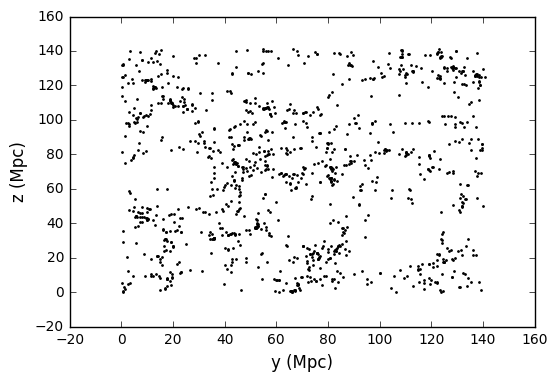

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

data = ascii.read('VCUslice.dat')
plt.scatter(data['y'],data['z'],s=1,c='k')
plt.xlabel('y (Mpc)',fontsize=12)
plt.ylabel('z (Mpc)',fontsize=12)
plt.show()

In [21]:
import numpy as np
from astropy.io import ascii

data = ascii.read('VCUslice.dat')

dis = np.sqrt((data['x']-50)**2 + data['y']**2 + data['z']**2)

mask = dis < 20
H0 = data['velocity'][mask]/dis[mask]
H0_mean = np.mean(H0)
H0_std = np.sqrt(np.sum((H0-np.mean(H0))**2)/(len(H0)-1))
print('D < 20  Mpc     : H0 = %-5.2f ± %-5.2f km s^-1 Mpc^-1'%(H0_mean,H0_std))

mask1 = dis > 25
mask2 = dis < 75
mask = mask1*mask2
H0 = data['velocity'][mask]/dis[mask]
H0_mean = np.mean(H0)
H0_std = np.sqrt(np.sum((H0-np.mean(H0))**2)/(len(H0)-1))
print('25 < D < 75 Mpc : H0 = %-5.2f ± %-5.2f km s^-1 Mpc^-1'%(H0_mean,H0_std))

mask = dis > 100
H0 = data['velocity'][mask]/dis[mask]
H0_mean = np.mean(H0)
H0_std = np.sqrt(np.sum((H0-np.mean(H0))**2)/(len(H0)-1))
print('D > 100 Mpc     : H0 = %-5.2f ± %-5.2f km s^-1 Mpc^-1'%(H0_mean,H0_std))

D < 20  Mpc     : H0 = 43.66 ± 60.15 km s^-1 Mpc^-1
25 < D < 75 Mpc : H0 = 76.33 ± 6.33  km s^-1 Mpc^-1
D > 100 Mpc     : H0 = 74.45 ± 2.60  km s^-1 Mpc^-1


In [22]:
import numpy as np
from astropy.io import ascii

data = ascii.read('VCUslice.dat')

dis = np.sqrt((data['x']-50)**2 + data['y']**2 + data['z']**2)

mask1 = dis < 20
mask2 = data['sfr']==0
mask = mask1*mask2
H0 = data['velocity'][mask]/dis[mask]
H0_mean = np.mean(H0)
H0_std = np.sqrt(np.sum((H0-np.mean(H0))**2)/(len(H0)-1))
print('D < 20  Mpc     : H0 = %-5.2f ± %-5.2f km s^-1 Mpc^-1'%(H0_mean,H0_std))

mask1 = dis > 25
mask2 = dis < 75
mask3 = data['sfr']==0
mask = mask1*mask2*mask3
H0 = data['velocity'][mask]/dis[mask]
H0_mean = np.mean(H0)
H0_std = np.sqrt(np.sum((H0-np.mean(H0))**2)/(len(H0)-1))
print('25 < D < 75 Mpc : H0 = %-5.2f ± %-5.2f km s^-1 Mpc^-1'%(H0_mean,H0_std))

mask1 = dis > 100
mask2 = data['sfr']==0
mask = mask1*mask2
H0 = data['velocity'][mask]/dis[mask]
H0_mean = np.mean(H0)
H0_std = np.sqrt(np.sum((H0-np.mean(H0))**2)/(len(H0)-1))
print('D > 100 Mpc     : H0 = %-5.2f ± %-5.2f km s^-1 Mpc^-1'%(H0_mean,H0_std))

D < 20  Mpc     : H0 = 60.59 ± 28.26 km s^-1 Mpc^-1
25 < D < 75 Mpc : H0 = 76.72 ± 7.49  km s^-1 Mpc^-1
D > 100 Mpc     : H0 = 74.15 ± 3.65  km s^-1 Mpc^-1


To eatimate the value of the Hubble constant, I make a linear fit of the data using the curve_fit function

from Scipy mudule of Python, which gives me both the fitting result of the Hubble constant and a standard 

deviation errors of the fitting result.

The fiting result is shown as below:

D < 20  Mpc     : H0 = 59.61 ± 5.67  km s^-1 Mpc^-1


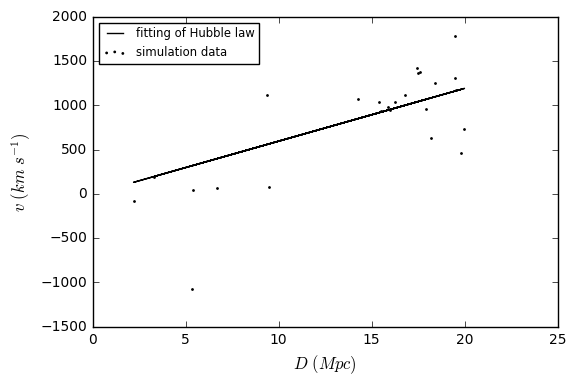

25 < D < 75 Mpc : H0 = 76.54 ± 0.35  km s^-1 Mpc^-1


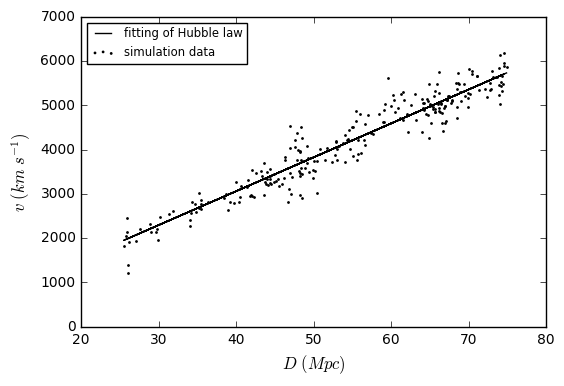

D > 100 Mpc     : H0 = 74.46 ± 0.10  km s^-1 Mpc^-1


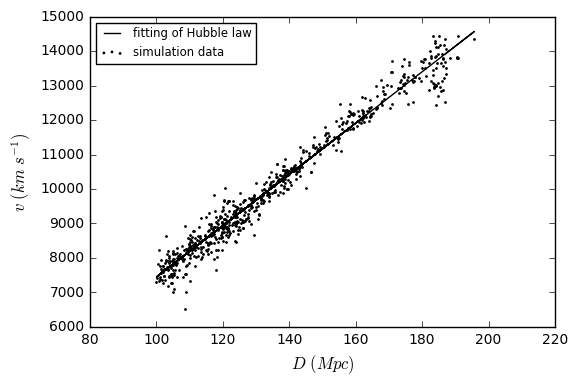

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit
 
def fitFunc(dis, H0):
    return H0*dis

data = ascii.read('VCUslice.dat')

dis = np.sqrt((data['x']-50)**2 + data['y']**2 + data['z']**2)
mask = dis < 20

fit_H0, fitCovariance = curve_fit(fitFunc, dis[mask], data['velocity'][mask])
#print (fitParams)
#print (fitCovariances)

fit_data = fit_H0*dis[mask]

errorbar = np.sqrt(np.diag(fitCovariance))
print('D < 20  Mpc     : H0 = %-5.2f ± %-5.2f km s^-1 Mpc^-1'%(fit_H0,errorbar))
plt.scatter(dis[mask], data['velocity'][mask],s=1,c='k',label='simulation data')
plt.plot(dis[mask],fit_data,'k-',label='fitting of Hubble law')
plt.xlabel('$D\ (Mpc)$',fontsize=12)
plt.ylabel('$v\ (km\ s^{-1})$',fontsize=12)
plt.legend(loc=2,fontsize='small')
plt.show()


mask1 = dis > 25
mask2 = dis < 75
mask =mask1*mask2

fit_H0, fitCovariance = curve_fit(fitFunc, dis[mask], data['velocity'][mask])
#print (fitParams)
#print (fitCovariances)

fit_data = fit_H0*dis[mask]

errorbar = np.sqrt(np.diag(fitCovariance))
print('25 < D < 75 Mpc : H0 = %-5.2f ± %-5.2f km s^-1 Mpc^-1'%(fit_H0,errorbar))
plt.scatter(dis[mask], data['velocity'][mask],s=1,c='k',label='simulation data')
plt.plot(dis[mask],fit_data,'k-',label='fitting of Hubble law')
plt.xlabel('$D\ (Mpc)$',fontsize=12)
plt.ylabel('$v\ (km\ s^{-1})$',fontsize=12)
plt.legend(loc=2,fontsize='small')
plt.show()


mask = dis > 100

fit_H0, fitCovariance = curve_fit(fitFunc, dis[mask], data['velocity'][mask])
#print (fitParams)
#print (fitCovariances)

fit_data = fit_H0*dis[mask]

errorbar = np.sqrt(np.diag(fitCovariance))
print('D > 100 Mpc     : H0 = %-5.2f ± %-5.2f km s^-1 Mpc^-1'%(fit_H0,errorbar))
plt.scatter(dis[mask], data['velocity'][mask],s=1,c='k',label='simulation data')
plt.plot(dis[mask],fit_data,'k-',label='fitting of Hubble law')
plt.xlabel('$D\ (Mpc)$',fontsize=12)
plt.ylabel('$v\ (km\ s^{-1})$',fontsize=12)
plt.legend(loc=2,fontsize='small')
plt.show()

From the fitting results as shown above, the accuracy of using the two relatively  nearby samples

are relatively bad, which is because of the peculiar velocities. Because the uncertainty of the 

peculiar velocities of galaxies exist no matter we measure the velocities of galaxies or not, so 

the peculiar velocities of galaxies is statistical uncertainty.

D < 20  Mpc     : H0 = 60.27 ± 14.19 km s^-1 Mpc^-1


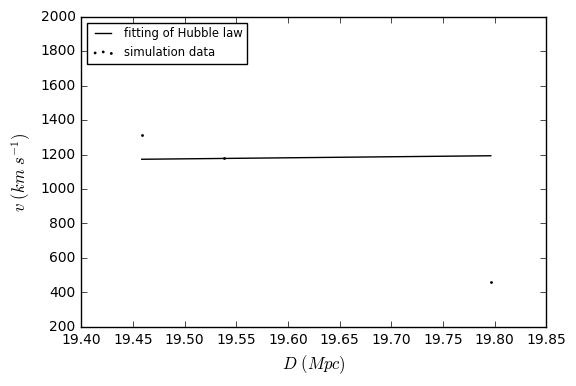

25 < D < 75 Mpc : H0 = 76.73 ± 1.02  km s^-1 Mpc^-1


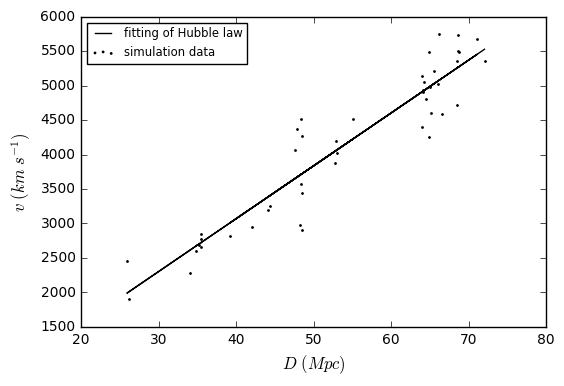

D > 100 Mpc     : H0 = 74.03 ± 0.29  km s^-1 Mpc^-1


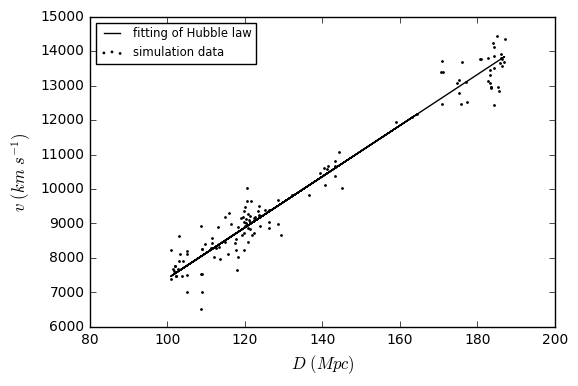

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit
 
def fitFunc(dis, H0):
    return H0*dis

data = ascii.read('VCUslice.dat')

dis = np.sqrt((data['x']-50)**2 + data['y']**2 + data['z']**2)
mask1 = dis < 20
mask2 = data['sfr']==0
mask =mask1*mask2

fit_H0, fitCovariance = curve_fit(fitFunc, dis[mask], data['velocity'][mask])
#print (fitParams)
#print (fitCovariances)

fit_data = fit_H0*dis[mask]

errorbar = np.sqrt(np.diag(fitCovariance))
print('D < 20  Mpc     : H0 = %-5.2f ± %-5.2f km s^-1 Mpc^-1'%(fit_H0,errorbar))
plt.scatter(dis[mask], data['velocity'][mask],s=1,c='k',label='simulation data')
plt.plot(dis[mask],fit_data,'k-',label='fitting of Hubble law')
plt.xlabel('$D\ (Mpc)$',fontsize=12)
plt.ylabel('$v\ (km\ s^{-1})$',fontsize=12)
plt.legend(loc=2,fontsize='small')
plt.show()


mask1 = dis > 25
mask2 = data['sfr']==0
mask3 = dis < 75
mask =mask1*mask2*mask3

fit_H0, fitCovariance = curve_fit(fitFunc, dis[mask], data['velocity'][mask])
#print (fitParams)
#print (fitCovariances)

fit_data = fit_H0*dis[mask]

errorbar = np.sqrt(np.diag(fitCovariance))
print('25 < D < 75 Mpc : H0 = %-5.2f ± %-5.2f km s^-1 Mpc^-1'%(fit_H0,errorbar))
plt.scatter(dis[mask], data['velocity'][mask],s=1,c='k',label='simulation data')
plt.plot(dis[mask],fit_data,'k-',label='fitting of Hubble law')
plt.xlabel('$D\ (Mpc)$',fontsize=12)
plt.ylabel('$v\ (km\ s^{-1})$',fontsize=12)
plt.legend(loc=2,fontsize='small')
plt.show()


mask1 = dis > 100
mask2 = data['sfr']==0
mask =mask1*mask2

fit_H0, fitCovariance = curve_fit(fitFunc, dis[mask], data['velocity'][mask])
#print (fitParams)
#print (fitCovariances)

fit_data = fit_H0*dis[mask]

errorbar = np.sqrt(np.diag(fitCovariance))
print('D > 100 Mpc     : H0 = %-5.2f ± %-5.2f km s^-1 Mpc^-1'%(fit_H0,errorbar))
plt.scatter(dis[mask], data['velocity'][mask],s=1,c='k',label='simulation data')
plt.plot(dis[mask],fit_data,'k-',label='fitting of Hubble law')
plt.xlabel('$D\ (Mpc)$',fontsize=12)
plt.ylabel('$v\ (km\ s^{-1})$',fontsize=12)
plt.legend(loc=2,fontsize='small')
plt.show()

After repeat the fitting using only elliptical galaxies, I get a similar result but a larger 

standard deviation errors of the fitting $H_{0}$. Though a small sample will result in a larger

statistical uncertainty, I think it can be also result from larger peculiar velocities of the 

elliptical galaxies for they usually close to the centers of galaxy clusters.

fitting of Hubble constant: 72.84 km s^-1 Mpc^-1


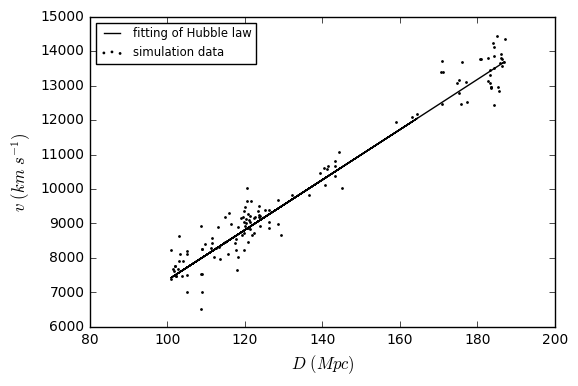

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import leastsq


def least(p,vel,dis):
    H0, c = p
    vel_m = H0*dis + c
    ls = vel - vel_m
    return ls

data = ascii.read('VCUslice.dat')
dis = np.sqrt((data['x']-50)**2 + data['y']**2 + data['z']**2)
mask1 = dis > 100
mask2 = data['sfr']==0
mask =mask1*mask2

p0 = [72.0,0.0]
plsq = leastsq(least, p0, args=(data['velocity'][mask],dis[mask]))
fit_data = plsq[0][0]*dis[mask] + plsq[0][0]

C_S = np.sum(((fit_data - data['velocity'][mask]))**2)
print('chi-square: %-10.3f'%C_S)

print('fitting of Hubble constant: %-5.2f km s^-1 Mpc^-1'%plsq[0][0])
plt.scatter(dis[mask],data['velocity'][mask],s=1,c='k',label='simulation data')
plt.plot(dis[mask],fit_data,'k-',label='fitting of Hubble law')
plt.xlabel('$D\ (Mpc)$',fontsize=12)
plt.ylabel('$v\ (km\ s^{-1})$',fontsize=12)
plt.legend(loc=2,fontsize='small')
plt.show()